In [1]:
# 판다스
import pandas as pd
# requests
import requests as req
# bs
from bs4 import BeautifulSoup as bs

# header
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

## 음원차트 크롤링
- 곡명, 가수명, 앨범사진

In [2]:
# 장르 리스트
genre=['ballad', 'rnh', 'rns', 'elec', 'rock', 'indie', 'idol']

# 곡명, 가수명, 앨범사진src링크 빈리스트 선언
song_lst = []
singer_lst = []
src_lst = []
genre_lst = []

# for문 사용하여 장르리스트 반복
for i in range(len(genre)):
    # f포매팅 사용하여 장르별 벅스차트 url 요청
    url = f'https://music.bugs.co.kr/genre/chart/kpop/{genre[i]}/total/week'
    res = req.get(url, headers = header)
    
    # 파이썬 객체변환
    html = bs(res.text, 'lxml')
    
    # 추출할 정보에 접근
    song = html.select('.title>a')
    singer = html.select('.artist>a:first-child')
    
    
    # 추출한 정보 담기
    for j in range(len(song)):
        song_lst.append(song[j].text)
        singer_lst.append(singer[j].text)
        genre_lst.append(genre[i])     

    # 장르 순위에서 곡별 앨범정보에 접근할수있는 링크 url 리스트 추출하기
    album = html.select('.thumbnail')
    album_url_lst = [j.attrs['href'] for j in album]
    
    # 앨범정보 url에 접근하여 곡명, 가수명, src링크 리스트에 데이터 담기
    for k in album_url_lst:
        # url요청및 파이썬 객체변환
        album_res = req.get(k, headers = header)
        album_html = bs(album_res.text, 'lxml')
        
        src = album_html.select('.big img')
    
        # 추출한 정보 담기
        src_lst.append(src[0].attrs['src'])
        

In [3]:
# 팝 장르 크롤링
url = 'https://music.bugs.co.kr/genre/chart/pop/pop/total/week'
res = req.get(url, headers = header)

html = bs(res.text, 'lxml')

song = html.select('.title>a')
singer = html.select('.artist>a:first-child')

for i in range(len(song)):
    song_lst.append(song[i].text)
    singer_lst.append(singer[i].text)
    genre_lst.append('pop')

album = html.select('.thumbnail')
album_url_lst = [i.attrs['href'] for i in album]

for i in album_url_lst:
    # url요청및 파이썬 객체변환
    album_res = req.get(i, headers = header)
    album_html = bs(album_res.text, 'lxml')
        
    src = album_html.select('.big img')
    
    # 추출한 정보 담기
    src_lst.append(src[0].attrs['src'])


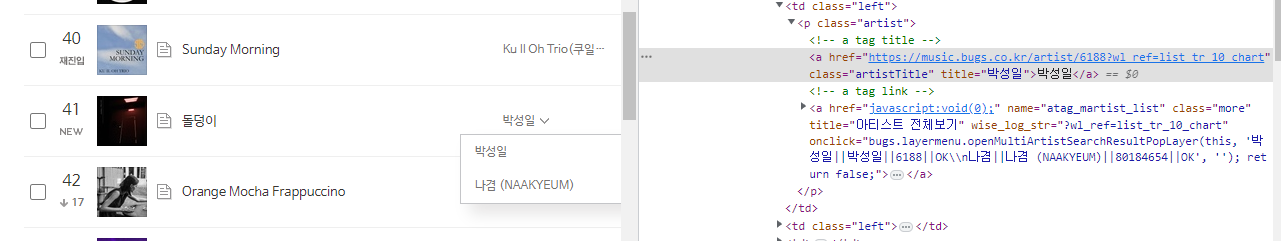

### 2023-02-22 곡명 가수명 매칭 안되는이유
- 벅스 음원차트 페이지내에 한 음원에 가수명이 들어가는 a태그가 두개가 있어서 밀림
- 해결방안 : 자손선택자중 first child 사용해보기

In [4]:
# 곡명, 가수명, src 딕셔너리 정의
dic = {'곡명':song_lst , '가수명':singer_lst, 'src':src_lst, '장르':genre_lst}

In [5]:
# 데이터 프레임 구성
song_df = pd.DataFrame(dic)

In [6]:
song_df

,곡명,가수명,src,장르
0,너의 모든 순간,성시경,https://image.bugsm.co.kr/album/images/200/413...,ballad
1,Monologue,테이(Tei),https://image.bugsm.co.kr/album/images/200/407...,ballad
2,혼자서 걸어요 (Prod. by 나얼),태연 (TAEYEON),https://image.bugsm.co.kr/album/images/200/408...,ballad
3,Say I Love You,우디(Woody),https://image.bugsm.co.kr/album/images/200/205...,ballad
4,그댄 행복에 살텐데 (2022),최유리,https://image.bugsm.co.kr/album/images/200/205...,ballad
...,...,...,...,...
795,THREAT,Rex Orange County(렉스 오렌지 카운티),https://image.bugsm.co.kr/album/images/200/189...,pop
796,I Don’t Think That I Like Her,Charlie Puth(찰리 푸스),https://image.bugsm.co.kr/album/images/200/408...,pop
797,IT'S YOU (feat. keshi),MAX(맥스),https://image.bugsm.co.kr/album/images/200/193...,pop
798,Nancy Got A Haircut,Alec Benjamin(알렉 벤자민),https://image.bugsm.co.kr/album/images/200/176...,pop


In [7]:
song_df.to_excel('./music.xlsx', index = False)